In [1]:
import pandas as pd
data=pd.read_csv('../data/Table1_new.csv')
data_year = data_year = data.loc[:,['Year_of_publication', 'Aligner', 'Application', 'Indexing', 
                                    'Global_Positioning', 'Pairwise_alignment_2']]
data_year.head()

,Year_of_publication,Aligner,Application,Indexing,Global_Positioning,Pairwise_alignment_2
0,2011,Bismark,BS-Seq,BWT-FM,Backward Search,Hamming Distance
1,2009,BRAT,BS-Seq,Hashing,Seed,Hamming Distance
2,2012,BRAT-BW,BS-Seq,BWT-FM,Backward Search,Hamming Distance
3,2010,BS-Seeker,BS-Seq,BWT-FM,Backward Search,Hamming Distance
4,2013,BS-Seeker2,BS-Seq,BWT-FM,Backward Search,Local & Global


In [283]:
from matplotlib import cm

clrs = ['cornflowerblue', 'darkorange', 'limegreen', 'crimson', 'plum', 'peru', 'aquamarine', 
        'pink', 'darkgrey', 'yellowgreen', 'lightcoral', 'gold']

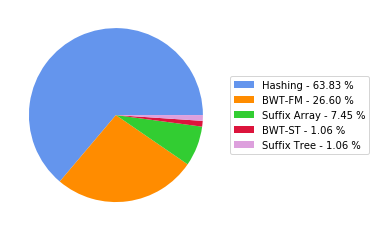

In [284]:
import matplotlib.pyplot as plt
import matplotlib


idx_group = data_year.groupby('Indexing').count().sort_values('Aligner', ascending=False)
patches, texts = plt.pie(idx_group.Aligner, colors=clrs)
pct = 100.*idx_group.Aligner/idx_group.Aligner.sum()
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(idx_group.index, pct)]
plt.legend(patches, labels, loc='center left', bbox_to_anchor=(1, .5))
plt.show()

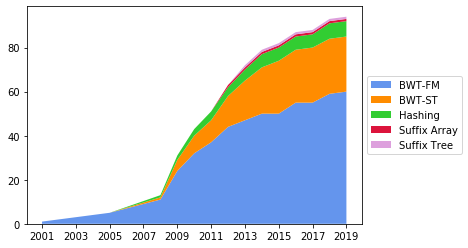

In [285]:
by_year = data_year.groupby(['Year_of_publication','Indexing']).count()
by_year = by_year.xs('Aligner', axis=1)
by_year = by_year.unstack(level = -1, fill_value=0)
by_year = by_year.cumsum()
x = by_year.index
by_year

plt.stackplot(x, by_year.loc[:,'Hashing'], by_year.loc[:,'BWT-FM'], by_year.loc[:,'Suffix Array'], 
              by_year.loc[:,'BWT-ST'], by_year.loc[:,'Suffix Tree'], 
              labels=by_year.columns, colors=clrs)
plt.legend(loc='center left', bbox_to_anchor=(1, .5))
plt.xticks(range(min(x), max(x)+1, 2))
plt.show()

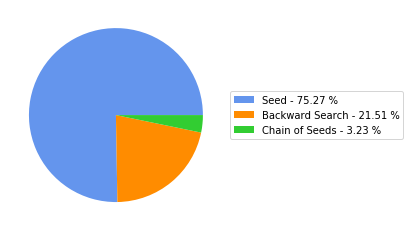

In [286]:
global_group = data_year.groupby('Global_Positioning').count().sort_values('Aligner', ascending=False)
patches, texts = plt.pie(global_group.Aligner, colors=clrs)
pct = 100.*global_group.Aligner/global_group.Aligner.sum()
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(global_group.index, pct)]
plt.legend(patches, labels, loc='center left', bbox_to_anchor=(1, .5))
plt.show()

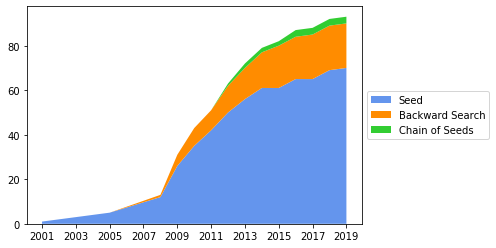

In [287]:
by_year = data_year.groupby(['Year_of_publication','Global_Positioning']).count()
by_year = by_year.xs('Aligner', axis=1)
by_year = by_year.unstack(level = -1, fill_value=0)
by_year = by_year.cumsum()
x = by_year.index

plt.stackplot(x, by_year.loc[:,'Seed'], by_year.loc[:,'Backward Search'], by_year.loc[:,'Chain of Seeds'], 
              labels=['Seed', 'Backward Search', 'Chain of Seeds'], colors=clrs)
plt.legend(loc='center left', bbox_to_anchor=(1, .5))
plt.xticks(range(min(x), max(x)+1, 2))
plt.show()

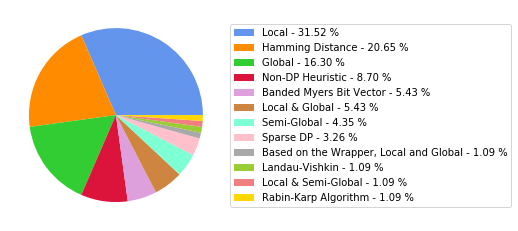

In [288]:
pairwise_group = data_year.groupby('Pairwise_alignment_2').count().sort_values('Aligner', ascending=False)
patches, texts = plt.pie(pairwise_group.Aligner, colors=clrs)
pct = 100.*pairwise_group.Aligner/pairwise_group.Aligner.sum()
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(pairwise_group.index, pct)]
plt.legend(patches, labels, loc='center left', bbox_to_anchor=(1, .5))
plt.show()

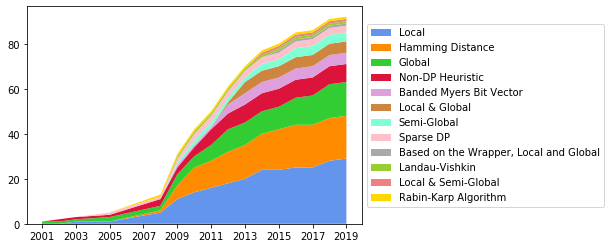

In [289]:
by_year = data_year.groupby(['Year_of_publication','Pairwise_alignment_2']).count()
by_year = by_year.xs('Aligner', axis=1)
by_year = by_year.unstack(level = -1, fill_value=0)
by_year = by_year.cumsum()
x = by_year.index

plt.stackplot(x, by_year.iloc[:,5], by_year.iloc[:,3], by_year.iloc[:,2], by_year.iloc[:,8], 
              by_year.iloc[:,0], by_year.iloc[:,6], by_year.iloc[:,10], by_year.iloc[:,11],
              by_year.iloc[:,1], by_year.iloc[:,4], by_year.iloc[:,7], by_year.iloc[:,9],
              labels=['Local', 'Hamming Distance', 'Global', 'Non-DP Heuristic', 'Banded Myers Bit Vector',
                     'Local & Global', 'Semi-Global', 'Sparse DP', 'Based on the Wrapper, Local and Global',
                     'Landau-Vishkin', 'Local & Semi-Global', 'Rabin-Karp Algorithm'], colors=clrs)
plt.legend(loc='center left', bbox_to_anchor=(1, .5))
plt.xticks(range(min(x), max(x)+1, 2))
plt.show()